In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid=f31a100bb8d9c516aed6a998ec64a5e3"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send GET request to OpenWeatherMap API
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | becerril
Processing Record 4 of Set 1 | tuburan
Processing Record 5 of Set 1 | arkhangel'sk
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | ketchikan
Processing Record 12 of Set 1 | serowe
Processing Record 13 of Set 1 | waiuku
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ourilandia do norte
City not found. Skipping...
Processing Record 17 of Set 1 | la gi
Processing Record 18 of Set 1 | praia da vitoria
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | sao vicente
Processing Record 21 of Set 1 | gandi
Process

Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | banda aceh
Processing Record 43 of Set 4 | st. john's
Processing Record 44 of Set 4 | rongelap
Processing Record 45 of Set 4 | noumea
Processing Record 46 of Set 4 | haiku-pauwela
Processing Record 47 of Set 4 | puerto rico
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | port mathurin
Processing Record 0 of Set 5 | mandiana
Processing Record 1 of Set 5 | egilsstadir
Processing Record 2 of Set 5 | bazarak
Processing Record 3 of Set 5 | dudinka
Processing Record 4 of Set 5 | red hill
Processing Record 5 of Set 5 | quellon
Processing Record 6 of Set 5 | brusyliv
Processing Record 7 of Set 5 | soissons
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | probolinggo
Processing Record 10 of Set 5 | abbadia san salvatore
Processing Record 11 of Set 5 | porto novo
Processing Record 12 of Set 5 | onega
Processing Record 13 of Set 5 | east london
Processing Record 14 of Set 5 | ki

City not found. Skipping...
Processing Record 33 of Set 8 | craig
Processing Record 34 of Set 8 | igarka
Processing Record 35 of Set 8 | midvagur
Processing Record 36 of Set 8 | mainit
Processing Record 37 of Set 8 | matoury
Processing Record 38 of Set 8 | almeirim
Processing Record 39 of Set 8 | teknaf
Processing Record 40 of Set 8 | wamba
Processing Record 41 of Set 8 | gazojak
Processing Record 42 of Set 8 | harper
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | palikir - national government center
Processing Record 45 of Set 8 | emerald
Processing Record 46 of Set 8 | mount gambier
Processing Record 47 of Set 8 | afaahiti
Processing Record 48 of Set 8 | dana point
Processing Record 49 of Set 8 | enriquillo
Processing Record 0 of Set 9 | antanifotsy
Processing Record 1 of Set 9 | selfoss
Processing Record 2 of Set 9 | malango
Processing Record 3 of Set 9 | tara
Processing Record 4 of Set 9 | i-n-salah
Processing Record 5 of Set 9 | ostersund
Processing Record 

Processing Record 21 of Set 12 | mejit
Processing Record 22 of Set 12 | saratamata
City not found. Skipping...
Processing Record 23 of Set 12 | kragujevac
Processing Record 24 of Set 12 | jeremoabo
Processing Record 25 of Set 12 | borujen
Processing Record 26 of Set 12 | sao felix do xingu
Processing Record 27 of Set 12 | masterton
Processing Record 28 of Set 12 | olgii
City not found. Skipping...
Processing Record 29 of Set 12 | puerto rosario
Processing Record 30 of Set 12 | wotton-under-edge
Processing Record 31 of Set 12 | frontera
Processing Record 32 of Set 12 | cole harbour
Processing Record 33 of Set 12 | uturoa
Processing Record 34 of Set 12 | mitu
Processing Record 35 of Set 12 | shizuishan
Processing Record 36 of Set 12 | gorontalo
Processing Record 37 of Set 12 | planaltina
Processing Record 38 of Set 12 | kolonia town
Processing Record 39 of Set 12 | plettenberg bay
Processing Record 40 of Set 12 | lauro de freitas
Processing Record 41 of Set 12 | jiran
Processing Record 4

In [14]:
# Fetch weather data for cities and create the city_data list

# Create the city_data_df DataFrame
city_data_df = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Display data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.66,96,98,9.26,TF,1686679480
1,constantia,44.1833,28.6500,293.54,76,67,5.17,RO,1686679211
2,becerril,9.7041,-73.2793,307.07,54,81,2.41,CO,1686679481
3,tuburan,6.6439,122.2736,299.48,87,100,1.36,PH,1686679481
4,arkhangel'sk,64.5401,40.5433,285.56,92,94,2.78,RU,1686679481


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.66,96,98,9.26,TF,1686679480
1,constantia,44.1833,28.6500,293.54,76,67,5.17,RO,1686679211
2,becerril,9.7041,-73.2793,307.07,54,81,2.41,CO,1686679481
3,tuburan,6.6439,122.2736,299.48,87,100,1.36,PH,1686679481
4,arkhangel'sk,64.5401,40.5433,285.56,92,94,2.78,RU,1686679481


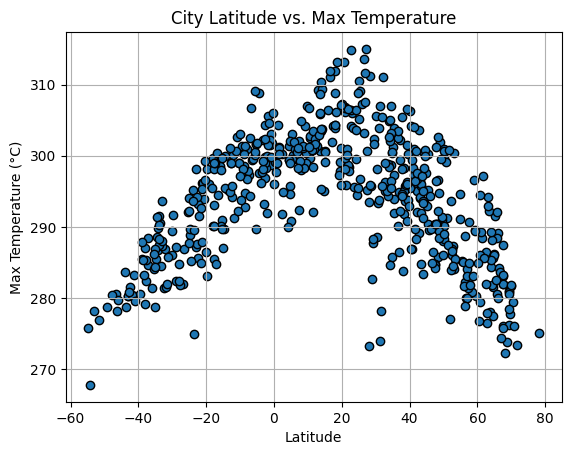

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show the plot
plt.show()


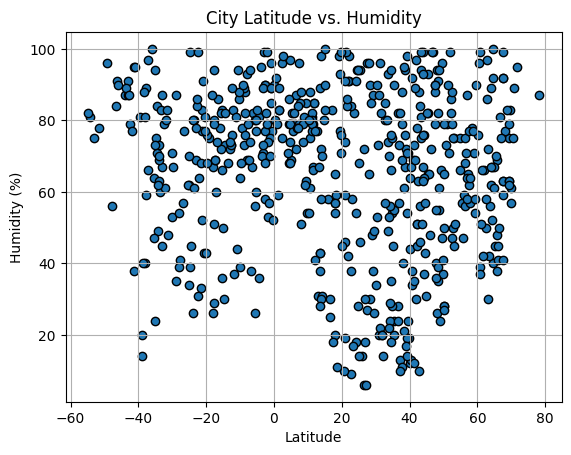

In [17]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()


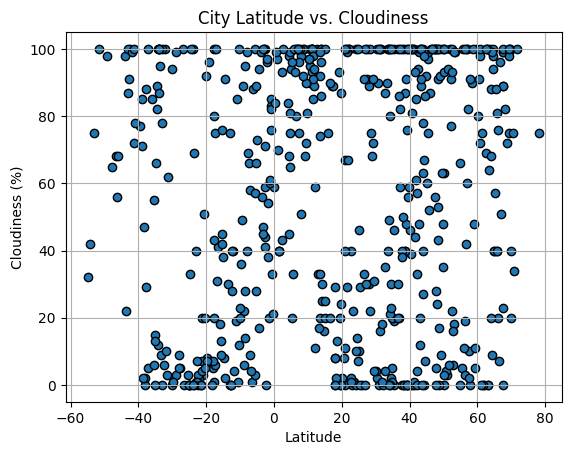

In [18]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()


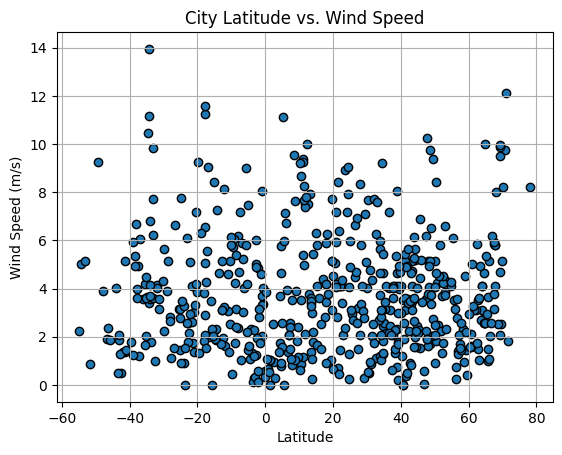

In [19]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()


In [20]:
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression values
    regress_values = x_values * slope + intercept

    # Create the scatter plot
    plt.scatter(x_values, y_values)

    # Add the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show the plot
    plt.show()

In [21]:
# Create a DataFrame with Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,constantia,44.1833,28.6500,293.54,76,67,5.17,RO,1686679211
2,becerril,9.7041,-73.2793,307.07,54,81,2.41,CO,1686679481
3,tuburan,6.6439,122.2736,299.48,87,100,1.36,PH,1686679481
4,arkhangel'sk,64.5401,40.5433,285.56,92,94,2.78,RU,1686679481
5,bethel,41.3712,-73.4140,297.27,73,100,3.09,US,1686679482


In [22]:
# Create a DataFrame with Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.66,96,98,9.26,TF,1686679480
6,grytviken,-54.2811,-36.5092,267.74,81,42,5.02,GS,1686679482
8,avarua,-21.2078,-159.7750,296.18,83,20,4.12,CK,1686679483
11,serowe,-22.3833,26.7167,285.63,31,0,2.17,BW,1686679484
12,waiuku,-37.2500,174.7500,284.63,66,5,1.20,NZ,1686679484


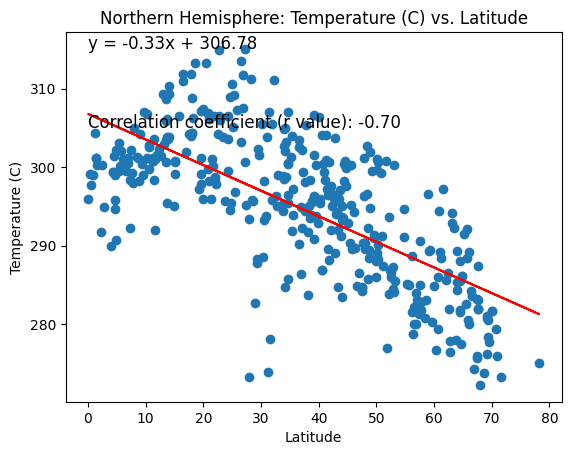

In [27]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Calculate the regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Create the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Add the regression line to the plot
plt.plot(northern_hemi_df["Lat"], regression_line, color="red")

# Set the title and labels
plt.title("Northern Hemisphere: Temperature (C) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Display the correlation coefficient and equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"Correlation coefficient (r value): {r_value:.2f}"
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Max Temp"].max(), equation, fontsize=12, color="black", ha="left")
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Max Temp"].max() - 10, r_value_text, fontsize=12, color="black", ha="left")

# Show the plot
plt.show()


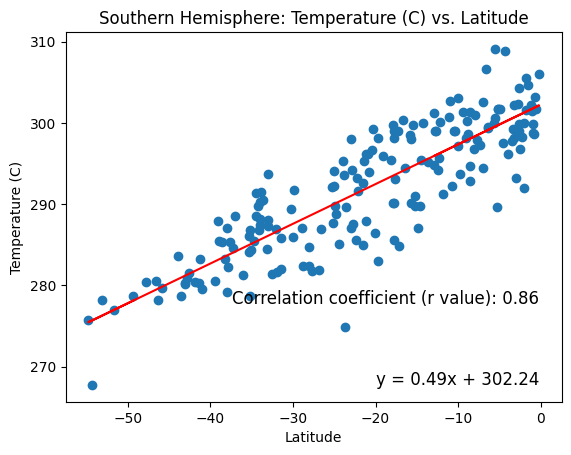

In [28]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Calculate the regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Create the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Add the regression line to the plot
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

# Set the title and labels
plt.title("Southern Hemisphere: Temperature (C) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Display the correlation coefficient and equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"Correlation coefficient (r value): {r_value:.2f}"
plt.text(southern_hemi_df["Lat"].max(), southern_hemi_df["Max Temp"].min(), equation, fontsize=12, color="black", ha="right")
plt.text(southern_hemi_df["Lat"].max(), southern_hemi_df["Max Temp"].min() + 10, r_value_text, fontsize=12, color="black", ha="right")

# Show the plot
plt.show()


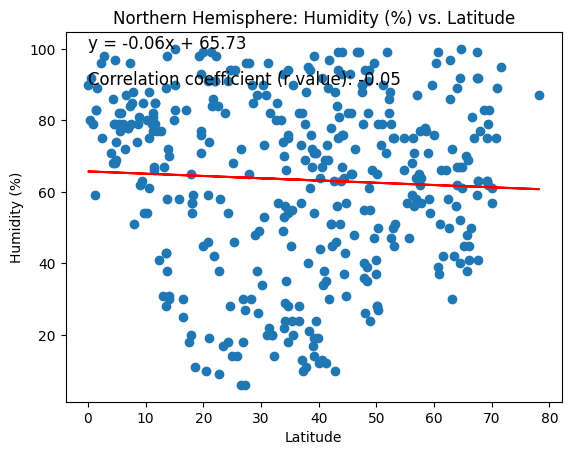

In [29]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate the regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Create the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Add the regression line to the plot
plt.plot(northern_hemi_df["Lat"], regression_line, color="red")

# Set the title and labels
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the correlation coefficient and equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"Correlation coefficient (r value): {r_value:.2f}"
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Humidity"].max(), equation, fontsize=12, color="black", ha="left")
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Humidity"].max() - 10, r_value_text, fontsize=12, color="black", ha="left")

# Show the plot
plt.show()


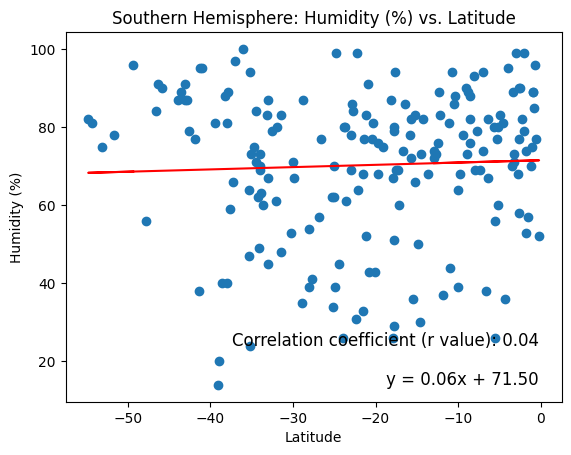

In [30]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate the regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Create the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Add the regression line to the plot
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

# Set the title and labels
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the correlation coefficient and equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"Correlation coefficient (r value): {r_value:.2f}"
plt.text(southern_hemi_df["Lat"].max(), southern_hemi_df["Humidity"].min(), equation, fontsize=12, color="black", ha="right")
plt.text(southern_hemi_df["Lat"].max(), southern_hemi_df["Humidity"].min() + 10, r_value_text, fontsize=12, color="black", ha="right")

# Show the plot
plt.show()


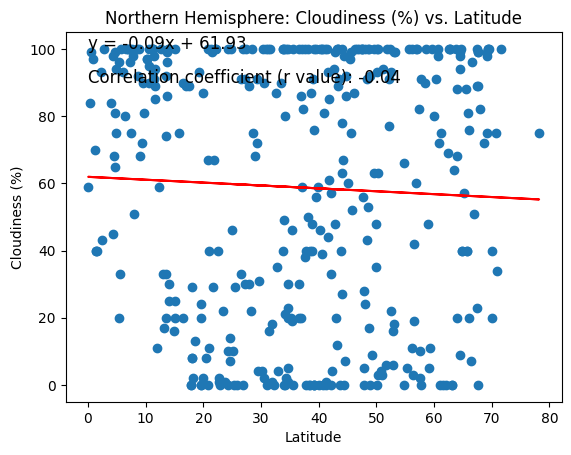

In [31]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate the regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Create the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(northern_hemi_df["Lat"], regression_line, color="red")

# Set the title and labels
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the correlation coefficient and equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"Correlation coefficient (r value): {r_value:.2f}"
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Cloudiness"].max(), equation, fontsize=12, color="black", ha="left")
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Cloudiness"].max() - 10, r_value_text, fontsize=12, color="black", ha="left")

# Show the plot
plt.show()


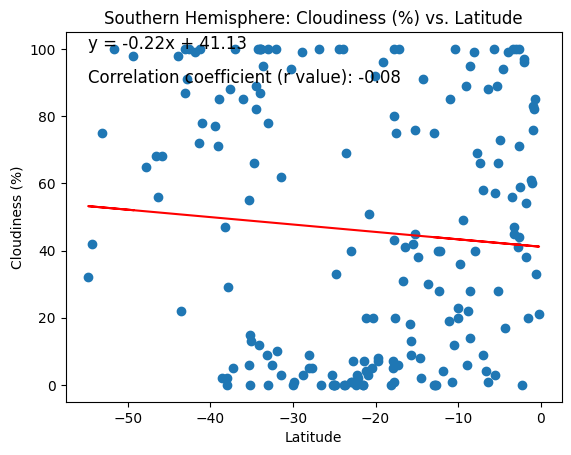

In [32]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate the regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Create the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

# Set the title and labels
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the correlation coefficient and equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"Correlation coefficient (r value): {r_value:.2f}"
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Cloudiness"].max(), equation, fontsize=12, color="black", ha="left")
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Cloudiness"].max() - 10, r_value_text, fontsize=12, color="black", ha="left")

# Show the plot
plt.show()


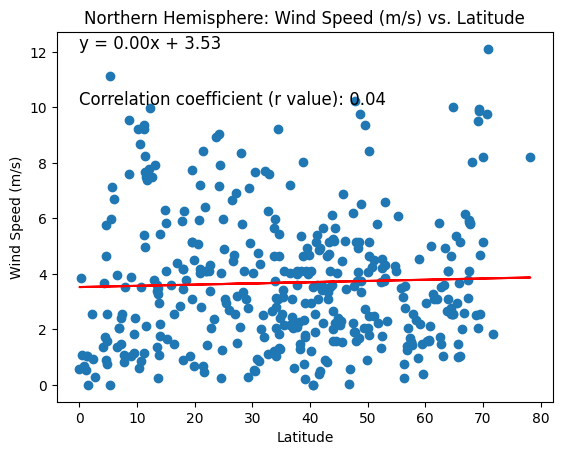

In [33]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate the regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Create the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(northern_hemi_df["Lat"], regression_line, color="red")

# Set the title and labels
plt.title("Northern Hemisphere: Wind Speed (m/s) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Display the correlation coefficient and equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"Correlation coefficient (r value): {r_value:.2f}"
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Wind Speed"].max(), equation, fontsize=12, color="black", ha="left")
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Wind Speed"].max() - 2, r_value_text, fontsize=12, color="black", ha="left")

# Show the plot
plt.show()


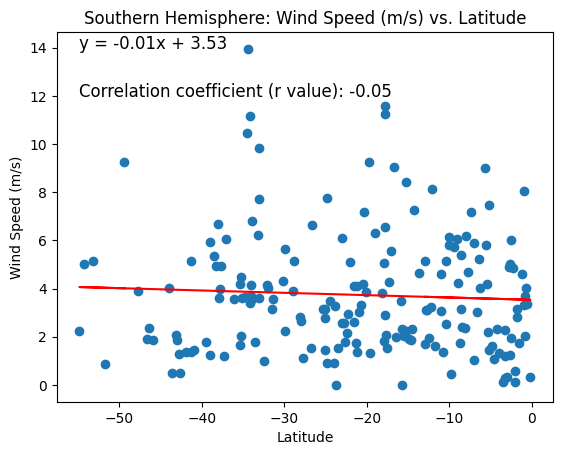

In [34]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate the regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Create the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

# Set the title and labels
plt.title("Southern Hemisphere: Wind Speed (m/s) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Display the correlation coefficient and equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_value_text = f"Correlation coefficient (r value): {r_value:.2f}"
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Wind Speed"].max(), equation, fontsize=12, color="black", ha="left")
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Wind Speed"].max() - 2, r_value_text, fontsize=12, color="black", ha="left")

# Show the plot
plt.show()
